In [113]:
# 必要なライブラリのインクルード
import os
from math import *
import re
import cv2
from PIL import Image as pilim
from PIL import ImageFilter
import matplotlib.pyplot as plt
import numpy as np
# opencv画像入力用
from IPython.display import display, Image

%matplotlib inline
def display_cv_image(image, format='.JPG'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))
    
def resizeAndShow(img,num):
    size = (4*num,4*num)
    show_img = cv2.resize(img, size)
    display_cv_image(show_img)

In [116]:
import skimage.transform  
# from PIL import Image  
import numpy as np  

def distort(file_path, roi_points, from_points, to_points):  
    im = pilim.open(file_path).convert('RGB')  
    from_points = np.concatenate((roi_points, from_points))  
    to_points = np.concatenate((roi_points, to_points))  
    affin = skimage.transform.PiecewiseAffineTransform()  
    affin.estimate(to_points, from_points)  
    im_array = skimage.transform.warp(im, affin)  
    im_array = np.array(im_array * 255., dtype=np.uint8)  
    if im_array.shape[2] == 1:  
        im_array = im_array.reshape((im_array.shape[0],im_array.shape[1]))  
    warped_im = pilim.fromarray(im_array, 'RGB')  
    im.paste(warped_im, (0, 0), warped_im)  
    return im  

file_path = './img/test.jpg'  
roi_points = [(100,100),(200,100),(200,200),(100,200)]  
from_points = [(100,100),(200,100),(200,200),(100,200)]  
to_points = [(120,120),(180,120),(180,180),(120,180)]  
im = distort(file_path, roi_points, from_points, to_points)


#RGB変換
im = im.convert("RGB")
im.save('./img/output.jpg') #変形後の写真


ValueError: bad transparency mask

原画


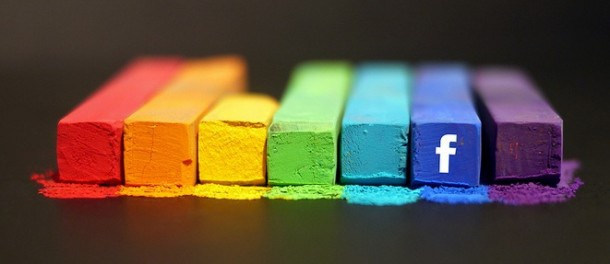

ベクトル場


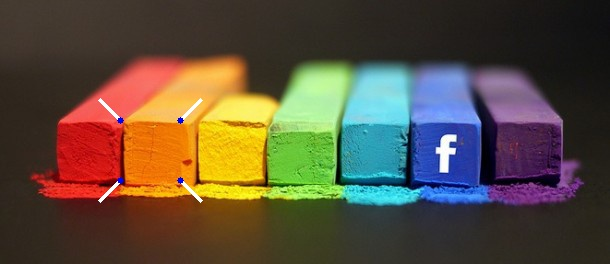

結果


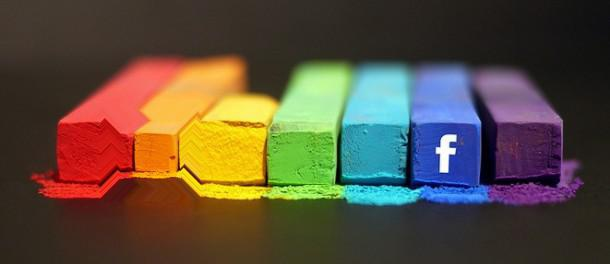

In [117]:
original_img = cv2.imread("./img/test.jpg")
img = cv2.imread("./img/output.jpg")
check_img = original_img
check_vec_img = original_img

#ベクトルだけの表示
# cv2.rectangle(check_vec_img, roi_points[0], roi_points[2], (0, 0, 255), 1)
for i in range(0,len(from_points)):
    cv2.line(check_vec_img, from_points[i], to_points[i], (255, 255, 255), 3)
    cv2.line(check_vec_img, to_points[i], to_points[i], (255, 0, 0), 5)


original_img = cv2.imread("./img/test.jpg")
print("原画")
display_cv_image(original_img)
print("ベクトル場")
display_cv_image(check_vec_img)
print("結果")
display_cv_image(img)